In [1]:
import pybaseball as ball
import pandas as pd


In [4]:
t = ball.statcast_batter('2024-03-28', '2024-05-13', 683002)
t.head()

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,FF,2024-05-12,95.1,-2.93,5.86,"Henderson, Gunnar",683002,668678,field_out,hit_into_play,...,1,1,3,Standard,Standard,213,-0.060,-0.460,71.900612,6.34347
1,FF,2024-05-12,95.2,-2.91,5.79,"Henderson, Gunnar",683002,668678,NaN,ball,...,1,1,3,Standard,Standard,210,0.000,0.023,NaN,NaN
2,FF,2024-05-12,94.2,-3.00,5.92,"Henderson, Gunnar",683002,668678,field_out,hit_into_play,...,0,0,0,Standard,Standard,212,-0.012,-0.093,76.891647,6.74973
3,SI,2024-05-12,92.1,-1.91,5.78,"Henderson, Gunnar",683002,621199,field_out,hit_into_play,...,2,2,9,Standard,Standard,233,-0.002,-0.268,76.209708,6.95350
4,FC,2024-05-12,87.0,-2.08,6.05,"Henderson, Gunnar",683002,621199,NaN,ball,...,2,2,9,Standard,Standard,148,0.000,0.037,NaN,NaN


In [36]:
data = ball.statcast('2024-03-28', '2024-05-13')
data = data.dropna(subset=['swing_length'])
data.to_csv("data/statcast24.csv")

This is a large query, it may take a moment to complete


c:\Python311\Lib\site-packages\pybaseball\statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
100%|██████████| 47/47 [00:27<00:00,  1.69it/s]
c:\Python311\Lib\site-packages\pybaseball\statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain 

In [40]:
statcast_data = data

In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import pearsonr



In [11]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [26]:

def draw_sz(sz_top=3.70, sz_bot=1.5, ls='k-'):
  """
  draw strike zone  
  draw the strike zone on a plot using mpl  
  inputs:
    sz_top: top of strike zone (ft) 
    sz_bot: bottom of strike zone (ft) 
    ls: linestyle (use `plt.plot()` linestyle conventions)  
  output:
    strike zone plot
  """
  plt.plot([-0.708, 0.708], [sz_bot,sz_bot], ls)
  plt.plot([-0.708, -0.708], [sz_bot,sz_top], ls)
  plt.plot([0.708, 0.708], [sz_bot,sz_top], ls)
  plt.plot([-0.708, 0.708], [sz_top,sz_top], ls) 

def draw_home_plate(catcher_perspective=True, ls='k-'):
  """
  draw home plate from either the catcher perspective or pitcher perspective  
  inputs: 
    catcher_perspective: orient home plate in the catcher POV. if False, orients
      home plate in the pitcher POV.  
    ls: linestyle (use `plt.plot()` linestyle conventions)  
  output:
    home plate plot
  """
  if catcher_perspective:
    plt.plot([-0.708, 0.708], [0,0], ls)
    plt.plot([-0.708, -0.708], [0,-0.3], ls)
    plt.plot([0.708, 0.708], [0,-0.3], ls)
    plt.plot([-0.708, 0], [-0.3, -0.6], ls)
    plt.plot([0.708, 0], [-0.3, -0.6], ls)
  else: 
    plt.plot([-0.708, 0.708], [0,0], ls)
    plt.plot([-0.708, -0.708], [0,0.1], ls)
    plt.plot([0.708, 0.708], [0,0.1], ls)
    plt.plot([-0.708, 0], [0.1, 0.3], ls)
    plt.plot([0.708, 0], [0.1, 0.3], ls)

def draw_attack_zones():
  """
  draw attack zones 
  draw the statcast attack zones on a plot using mpl  
  inputs:
    none! lulw
  output:
    attack zone plot
  """

  # outer heart / inner shadow
  plt.plot([-0.558, 0.558], [1.833,1.833], color=(227/255, 150/255, 255/255), ls='-', lw=3)
  plt.plot([-0.558, -0.558], [1.833,3.166], color=(227/255, 150/255, 255/255), ls='-', lw=3)
  plt.plot([0.558, 0.558], [1.833,3.166], color=(227/255, 150/255, 255/255), ls='-', lw=3)
  plt.plot([-0.558, 0.558], [3.166,3.166], color=(227/255, 150/255, 255/255), ls='-', lw=3) 

  # outer shadow /  inner chase 
  plt.plot([-1.108, 1.108], [1.166,1.166], color=(255/255, 197/255, 150/255), ls='-', lw=3)
  plt.plot([-1.108, -1.108], [1.166,3.833], color=(255/255, 197/255, 150/255), ls='-', lw=3)
  plt.plot([1.108, 1.108], [1.166,3.833], color=(255/255, 197/255, 150/255), ls='-', lw=3)
  plt.plot([-1.108, 1.108], [3.833,3.833], color=(255/255, 197/255, 150/255), ls='-', lw=3) 

  # outer chase 
  plt.plot([-1.666, 1.666], [0.5,0.5], color=(209/255, 209/255, 209/255), ls='-', lw=3)
  plt.plot([-1.666, -1.666], [0.5,4.5], color=(209/255, 209/255, 209/255), ls='-', lw=3)
  plt.plot([1.666, 1.666], [0.5,4.5], color=(209/255, 209/255, 209/255), ls='-', lw=3)
  plt.plot([-1.666, 1.666], [4.5,4.5], color=(209/255, 209/255, 209/255), ls='-', lw=3) 

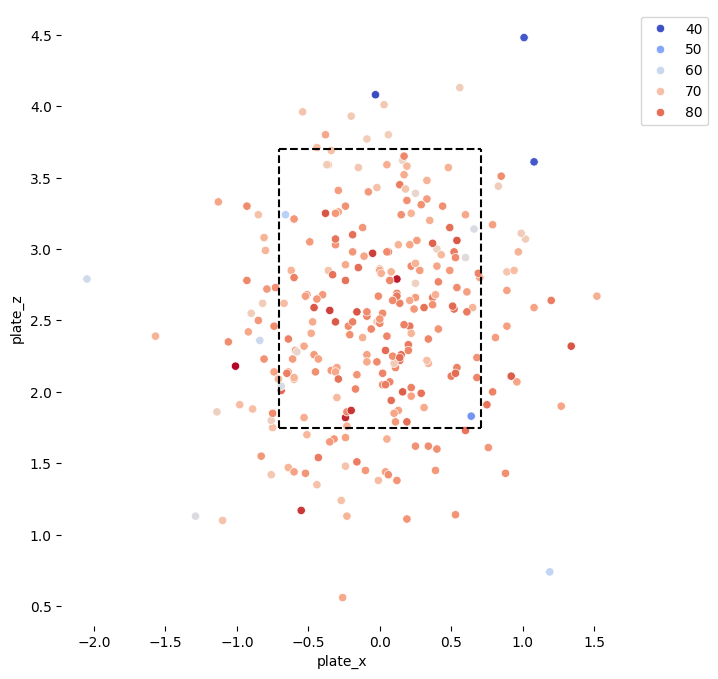

In [35]:
fig = plt.figure(figsize=(8,8))
fig = sns.scatterplot(data=t, x='plate_x', y='plate_z', 
                      hue='bat_speed', palette='coolwarm')
draw_sz(ls='k--')
fig.set_aspect('equal')
plt.legend(bbox_to_anchor=(1.02,1), loc=2)
sns.despine(left=True, bottom=True)
plt.show()

In [29]:
import numpy as np
import pandas as pd
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

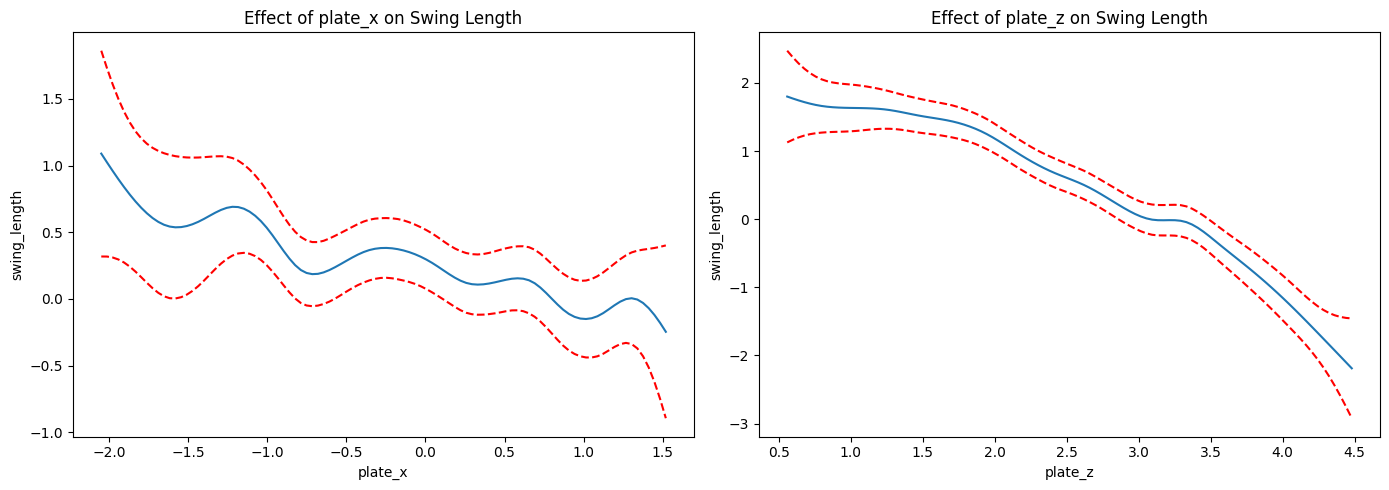

In [33]:
data = data.dropna(subset=['swing_length'])
gam = LinearGAM(s(0) + s(1)).fit(data[['plate_x', 'plate_z']], data['swing_length'])

# Plotting the partial dependency plots for plate_x and plate_z
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

titles = ['Effect of plate_x on Swing Length', 'Effect of plate_z on Swing Length']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i])
    if i == 0:
        ax.set_xlabel('plate_x')
    else:
        ax.set_xlabel('plate_z')
    ax.set_ylabel('swing_length')

plt.tight_layout()
plt.show()

In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


# Define the dependent and independent variables
X = data[['plate_x', 'plate_z']]
y = data['swing_length']

# Add a constant to the independent variables matrix (for the intercept term)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           swing_length   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     255.0
Date:                Mon, 13 May 2024   Prob (F-statistic):           4.15e-63
Time:                        11:55:28   Log-Likelihood:                -195.68
No. Observations:                 275   AIC:                             397.4
Df Residuals:                     272   BIC:                             408.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5461      0.116     82.019      0.0

In [42]:
statcast_data = statcast_data.dropna(subset=['bat_speed', 'swing_length'])
# Function to calculate required metrics for each player
def calculate_player_metrics(player_data):
    # 90th percentile bat_speed
    bat_speed_90th = np.percentile(player_data['bat_speed'], 90)
    
    # Standard deviation of bat_speed
    bat_speed_std = np.std(player_data['bat_speed'])
    
    # Linear regression to find the coefficient for swing_length
    X = sm.add_constant(player_data['swing_length'])
    y = player_data['bat_speed']
    model = sm.OLS(y, X).fit()
    swing_length_coefficient = model.params['swing_length']
    
    # Contact swings: relationship between bat_speed and launch_speed
    contact_swings = player_data.dropna(subset=['launch_speed'])
    if len(contact_swings) >= 2:
        contact_corr, _ = pearsonr(contact_swings['bat_speed'], contact_swings['launch_speed'])
    else:
        contact_corr = np.nan
    
    # Estimated wOBA using speed angle for top 50% of bat_speeds
    top_50_bat_speed = player_data.nlargest(len(player_data) // 2, 'bat_speed')
    estimated_woba = top_50_bat_speed['estimated_woba_using_speedangle'].mean()
    
    # Count of swings
    swing_count = len(player_data)
    
    return pd.Series({
        'bat_speed_90th': bat_speed_90th,
        'bat_speed_std': bat_speed_std,
        'swing_length_coefficient': swing_length_coefficient,
        'contact_corr': contact_corr,
        'estimated_woba': estimated_woba,
        'swing_count': swing_count
    })

# Group by 'player_name' and 'batter' and apply the function
player_metrics = statcast_data.groupby(['player_name', 'batter']).apply(calculate_player_metrics).reset_index()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [45]:
statcast_data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
2649,SL,2024-05-12,90.3,-2.99,6.12,"Martinez, Justin",681297,679885,double_play,hit_into_play,...,2,2,9,Standard,Standard,245,-0.001,-0.204,76.15541,7.57714
3912,FS,2024-05-12,91.5,-2.81,6.22,"Martinez, Justin",623993,679885,field_out,hit_into_play,...,2,2,9,Standard,Standard,241,-0.001,-0.207,70.828152,8.07396
1418,FF,2024-05-12,95.0,-1.56,6.39,"Suárez, Albert",666971,544150,field_out,hit_into_play,...,2,9,2,Standard,Standard,221,0.0,-0.088,79.629077,6.49418
1743,FS,2024-05-12,85.2,-1.88,6.07,"Bowman, Matt",656811,621199,field_error,hit_into_play,...,2,2,9,Infield shade,Standard,264,0.001,0.157,76.037433,7.90576
1844,FS,2024-05-12,84.3,-1.77,5.93,"Bowman, Matt",668939,621199,field_out,hit_into_play,...,2,2,9,Infield shade,Standard,254,-0.001,-0.204,73.250942,7.34622


In [ ]:
statcast_data = pd.read_csv("data/statcast24.csv")

In [74]:
import pandas as pd
import numpy as np
from pybaseball import playerid_reverse_lookup  # Ensure you have pybaseball installed
import statsmodels.api as sm

# Function to get player names given a list of IDs
def get_player_names(player_ids):
    data = playerid_reverse_lookup(player_ids, key_type='mlbam')
    data['Name'] = data['name_first'] + ' ' + data['name_last']
    return data[['key_mlbam', 'Name']]

# Load the dataset
statcast_data = pd.read_csv("data/statcast24.csv")
statcast_data.dropna(subset=['bat_speed', 'swing_length'], inplace=True)

# Function to calculate required metrics for each player
def calculate_player_metrics(player_data):
    # 90th percentile bat_speed
    bat_speed_90th = np.percentile(player_data['bat_speed'], 90)
    
    # 80th percentile bat_speed
    bat_speed_80th = np.percentile(player_data['bat_speed'], 80)
    
    # Standard deviation of bat_speed
    bat_speed_std = np.std(player_data['bat_speed'])
    
    # Linear regression to find the coefficient and p-value for swing_length
    X = player_data[['swing_length']]
    y = player_data['bat_speed']
    model = sm.OLS(y, X).fit()
    swing_length_coefficient = model.params['swing_length']
    swing_length_pvalue = model.pvalues['swing_length']
    
    # Contact swings: relationship between bat_speed and launch_speed
    contact_swings = player_data.dropna(subset=['launch_speed'])
    if len(contact_swings) >= 2:
        X_contact = contact_swings[['bat_speed']]
        y_contact = contact_swings['launch_speed']
        contact_model = sm.OLS(y_contact, X_contact).fit()
        contact_coefficient = contact_model.params['bat_speed']
        contact_pvalue = contact_model.pvalues['bat_speed']
        contact_r2 = contact_model.rsquared
    else:
        contact_coefficient = np.nan
        contact_pvalue = np.nan
        contact_r2 = np.nan
    
    # Estimated wOBA using speed angle for top 50% of bat_speeds
    swing_count = len(player_data)
    top_50_bat_speed = player_data.nlargest(len(player_data) // 2, 'bat_speed')
    estimated_woba_top50 = top_50_bat_speed['estimated_woba_using_speedangle'].mean()
    # Estimated wOBA using speed angle for top 25% of bat_speeds
    top_25_bat_speed = player_data.nlargest(len(player_data) // 4, 'bat_speed')
    estimated_woba_top25 = top_25_bat_speed['estimated_woba_using_speedangle'].mean()

    # Estimated wOBA per swing with NAs treated as 0s for top 50% of bat_speeds
    player_data['estimated_woba_using_speedangle'].fillna(0, inplace=True)
    top_50_bat_speed = player_data.nlargest(len(player_data) // 2, 'bat_speed')
    estimated_woba_per_swing_top50 = top_50_bat_speed['estimated_woba_using_speedangle'].mean()

    # Estimated wOBA using speed angle for top 25% of bat_speeds
    top_25_bat_speed = player_data.nlargest(len(player_data) // 4, 'bat_speed')
    # Estimated wOBA per swing with NAs treated as 0s for top 25% of bat_speeds
    estimated_woba_per_swing_top25 = top_25_bat_speed['estimated_woba_using_speedangle'].mean()
    
    return pd.Series({
        'bat_speed_90th': bat_speed_90th,
        'bat_speed_80th': bat_speed_80th,
        'bat_speed_std': bat_speed_std,
        'swing_length_coefficient': swing_length_coefficient,
        'swing_length_pvalue': swing_length_pvalue,
        'contact_coefficient': contact_coefficient,
        'contact_pvalue': contact_pvalue,
        'contact_r2': contact_r2,
        'estimated_woba_50th_percentile': estimated_woba_top50,
        'estimated_woba_75th_percentile': estimated_woba_top25,
        'estimated_woba_per_swing_top50': estimated_woba_per_swing_top50 ,
        'estimated_woba_per_swing_top25': estimated_woba_per_swing_top25,
        'swing_count': swing_count,
        'average_bat_speed': player_data['bat_speed'].mean()
    })

# Calculate the metrics for each player
stats = statcast_data.groupby('batter').apply(calculate_player_metrics).reset_index()

# Remove players with fewer than 100 swings
stats = stats[stats['swing_count'] >= 100]

# Sort by average bat_speed
stats_sorted = stats.sort_values(by='average_bat_speed', ascending=False).reset_index(drop=True)

# Get the list of player IDs
player_ids = stats_sorted['batter'].tolist()

# Get the player names
player_names_df = get_player_names(player_ids)

# Merge the player names with stats_sorted
stats_sorted = stats_sorted.merge(player_names_df, left_on='batter', right_on='key_mlbam', how='left')

# Drop the redundant 'key_mlbam' column
stats_sorted.drop(columns=['key_mlbam'], inplace=True)

# Move the 'Name' column to the front
cols = ['Name'] + [col for col in stats_sorted.columns if col != 'Name']
stats_sorted = stats_sorted[cols]

# Display the first few rows of the final DataFrame
print(stats_sorted.head())

                Name  batter  bat_speed_90th  bat_speed_80th  bat_speed_std  \
0  giancarlo stanton  519317       83.702371       82.465986       4.520539   
1  christopher morel  666624       80.426240       78.853153       5.717684   
2         oneil cruz  665833       83.628169       82.326476      10.151083   
3       matt chapman  656305       82.523520       80.622846       8.332503   
4     yordan álvarez  670541       80.386398       79.141905       6.139179   

   swing_length_coefficient  swing_length_pvalue  contact_coefficient  \
0                  9.530009        2.156562e-225             1.075337   
1                  9.443059        8.429563e-257             1.129061   
2                  9.839041        4.897582e-161             1.125617   
3                 10.208824        5.899096e-236             1.090919   
4                  9.874495        6.468982e-222             1.153238   

   contact_pvalue  contact_r2  estimated_woba_50th_percentile  \
0    3.823299e-99    

In [76]:
stats_sorted['diff_between_wobacon_woba_50'] = stats_sorted['estimated_woba_50th_percentile'] - stats_sorted['estimated_woba_per_swing_top50']
stats_sorted['diff_between_wobacon_woba_25'] = stats_sorted['estimated_woba_75th_percentile'] - stats_sorted['estimated_woba_per_swing_top25']

In [77]:
stats_sorted.to_csv("data/bat_speed_leaders.csv")

                             OLS Regression Results                            
Dep. Variable:     std_dev_second_half   R-squared:                       0.140
Model:                             OLS   Adj. R-squared:                  0.137
Method:                  Least Squares   F-statistic:                     50.42
Date:                 Mon, 13 May 2024   Prob (F-statistic):           8.53e-12
Time:                         13:23:02   Log-Likelihood:                -682.65
No. Observations:                  312   AIC:                             1369.
Df Residuals:                      310   BIC:                             1377.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.7

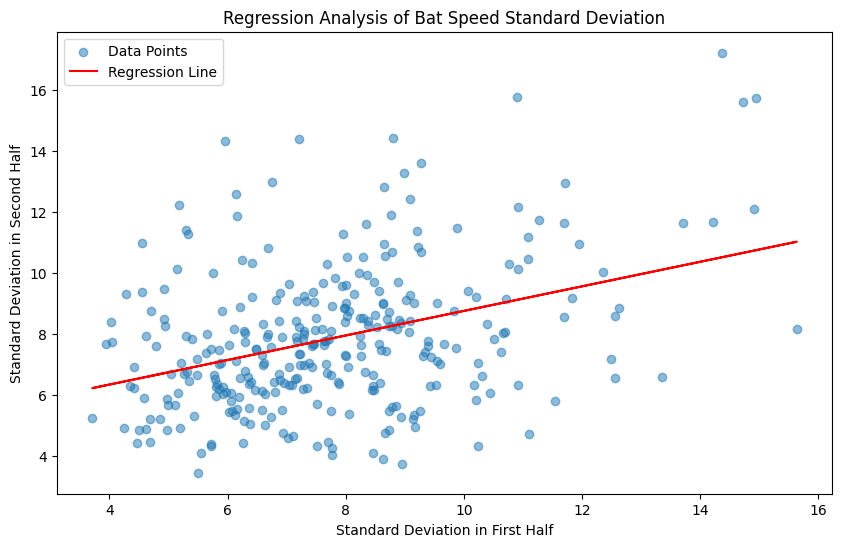

In [78]:
import pandas as pd
import numpy as np

# Load the dataset
statcast_data = pd.read_csv("data/statcast24.csv")
statcast_data.dropna(subset=['bat_speed'], inplace=True)

swings_count = statcast_data['batter'].value_counts()
valid_batters = swings_count[swings_count >= 100].index
statcast_data = statcast_data[statcast_data['batter'].isin(valid_batters)]

# Function to calculate standard deviations for two random halves
def calculate_std_dev_correlation(player_data):
    # Shuffle the player data
    shuffled_data = player_data.sample(frac=1).reset_index(drop=True)
    
    # Split the data into two halves
    half_point = len(shuffled_data) // 2
    first_half = shuffled_data.iloc[:half_point]
    second_half = shuffled_data.iloc[half_point:]
    
    # Calculate standard deviation for each half
    std_dev_first_half = first_half['bat_speed'].std()
    std_dev_second_half = second_half['bat_speed'].std()
    
    return pd.Series({
        'std_dev_first_half': std_dev_first_half,
        'std_dev_second_half': std_dev_second_half
    })

# Calculate the standard deviations for each player's two halves
std_devs = statcast_data.groupby('batter').apply(calculate_std_dev_correlation)

# Regression analysis
X = sm.add_constant(std_devs['std_dev_first_half'])  # adding a constant
y = std_devs['std_dev_second_half']
model = sm.OLS(y, X).fit()

# Regression Summary
print(model.summary())

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(std_devs['std_dev_first_half'], std_devs['std_dev_second_half'], alpha=0.5, label='Data Points')
plt.plot(std_devs['std_dev_first_half'], model.predict(X), color='red', label='Regression Line')
plt.title('Regression Analysis of Bat Speed Standard Deviation')
plt.xlabel('Standard Deviation in First Half')
plt.ylabel('Standard Deviation in Second Half')
plt.legend()
plt.show()


In [80]:
data = ball.statcast('2023-03-28', '2023-05-13')
data = data.dropna(subset=['swing_length'])
data.head(30)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length


                             OLS Regression Results                            
Dep. Variable:     contact_coefficient   R-squared:                       0.559
Model:                             OLS   Adj. R-squared:                  0.558
Method:                  Least Squares   F-statistic:                     392.8
Date:                 Mon, 13 May 2024   Prob (F-statistic):           4.79e-57
Time:                         14:57:22   Log-Likelihood:                 693.43
No. Observations:                  312   AIC:                            -1383.
Df Residuals:                      310   BIC:                            -1375.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.8883

C:\Users\Jack Siemens\AppData\Local\Temp\ipykernel_30836\1367160155.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(stats_sorted['average_bat_speed'], stats_sorted['contact_coefficient'], alpha=0.7, edgecolors='w', s=100, label='Data Points', cmap='viridis')


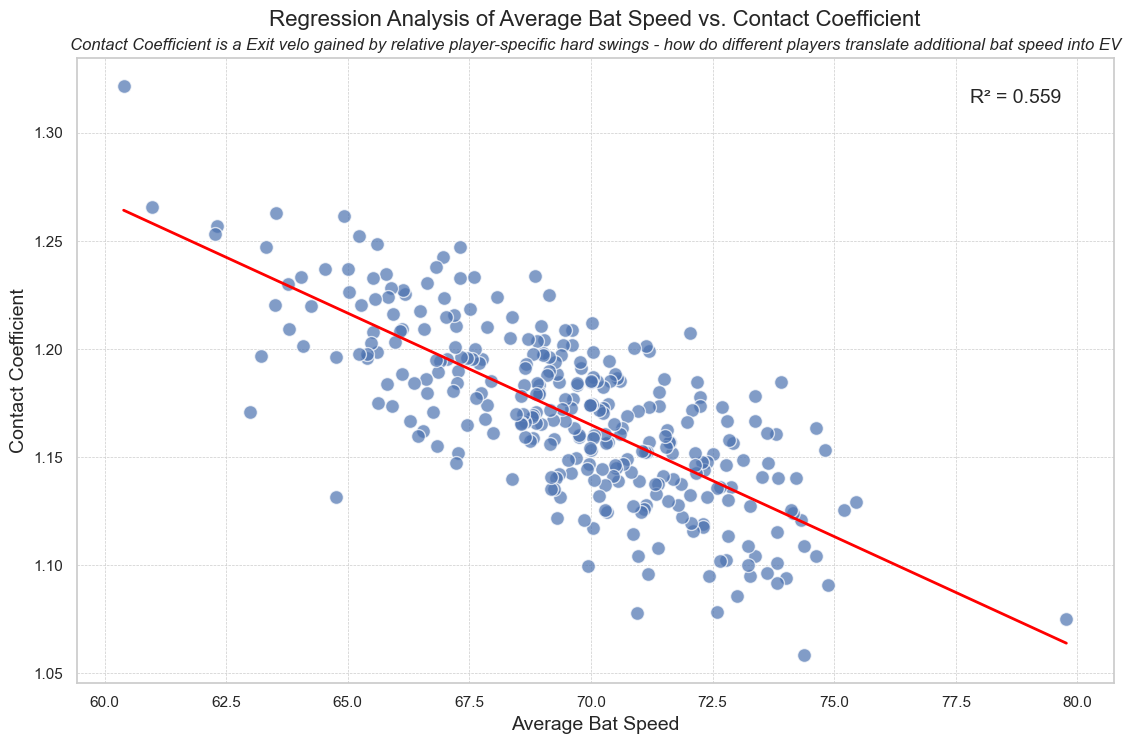

In [97]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a style for the plot
sns.set(style='whitegrid')

# Regression analysis
X = sm.add_constant(stats_sorted['average_bat_speed'])  # adding a constant
y = stats_sorted['contact_coefficient']
model = sm.OLS(y, X).fit()
r_squared = model.rsquared
# Regression Summary
print(model.summary())

plt.figure(figsize=(12, 8))
plt.scatter(stats_sorted['average_bat_speed'], stats_sorted['contact_coefficient'], alpha=0.7, edgecolors='w', s=100, label='Data Points', cmap='viridis')
plt.plot(stats_sorted['average_bat_speed'], model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Regression Analysis of Average Bat Speed vs. Contact Coefficient\n', fontsize=16)
plt.text(0.5, 1.02, "Contact Coefficient is a Exit velo gained by relative player-specific hard swings - how do different players translate additional bat speed into EV",
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, style='italic')
plt.xlabel('Average Bat Speed', fontsize=14)
plt.ylabel('Contact Coefficient', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.text(0.95, 0.95, f'R² = {r_squared:.3f}', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the subtitle
plt.show()
